# Checking the structure of the grid in each case

In [24]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db = '/g/data/x77/amh157/anu-tub/diagnostics/anu-tub.db'

In [3]:
session=cc.database.create_session(db)

In [4]:
experiments=['anu-tub-n3','anu-tub-sig-hotstart','anu-tub-hycom1','anu-tub-adapt','anu-tub-sig-sym']

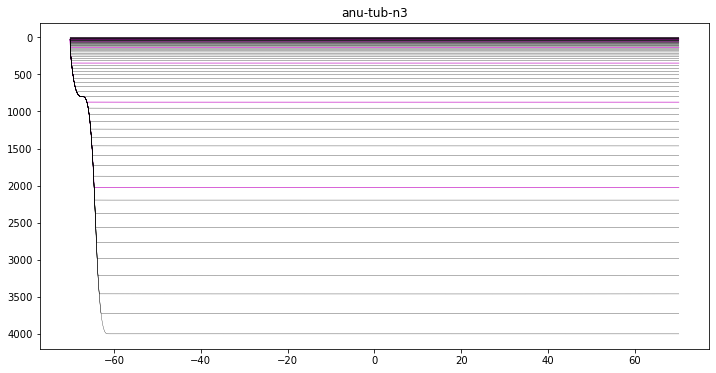

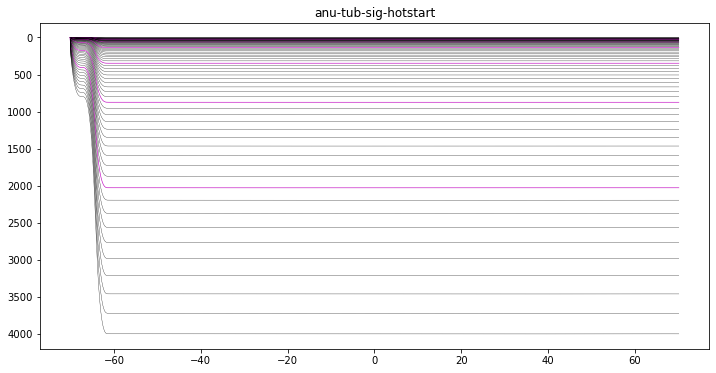

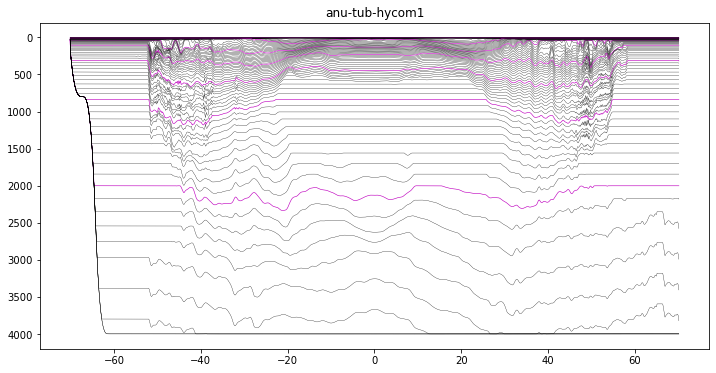

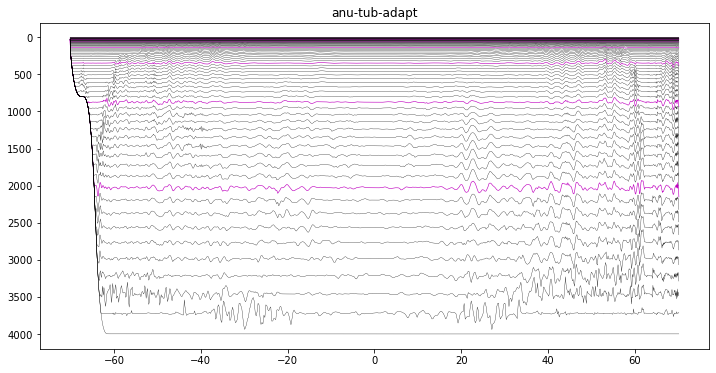

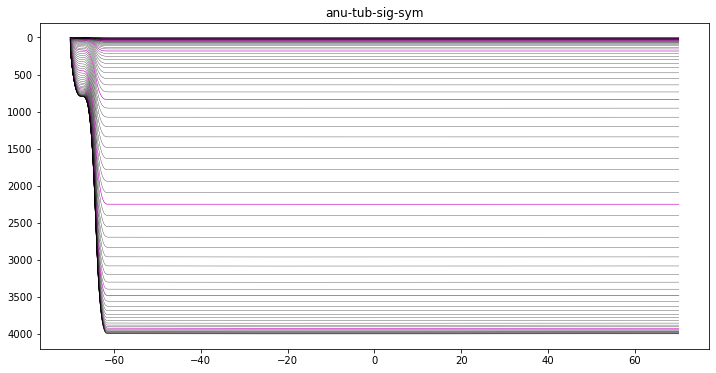

In [33]:
for experiment in experiments:
    plt.figure(figsize=(12,6))
    darray = cc.querying.getvar(experiment, 'thkcello', session,ncfile='ocean_month.nc',n=-1).isel(time=-1)
    depth = darray.isel(xh=40).cumsum('zl').values
    for ii in range(75):
        if np.mod(ii,10)==5:
            plt.plot(darray.yh.values,depth[ii,:],'m',linewidth=0.6)
        else:
            plt.plot(darray.yh.values,depth[ii,:],'k',linewidth=0.3)
    #plt.xlim([-71,0])
    plt.gca().invert_yaxis()
    plt.title(experiment)

## Summary:
* Sigma models look as expected
* Hycom1 case looks OK at midlatitudes but we have z levels to the bottom at high latitudes
* Adaptive not really following density layers -- is restoring too strong?? 